In [27]:
import os
os.chdir('/home/yuanyu/projects/trailer_project/trailer-classification')


import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns


from tp.utils.device import get_default_device
from tp.utils.plt import plt_confusion_matrix


os.environ["CUDA_VISIBLE_DEVICES"] = '3'
np.random.seed(1)
torch.manual_seed(1)
torch.cuda.manual_seed(1)
device = get_default_device()
precomputed_outputs = './predict_outputs.out'


def plt_confusion_matrix(outputs, y_true, num_classes, classes='auto'):
    sns.set()

    confusion_matrix = torch.zeros(num_classes, num_classes)
    with torch.no_grad():
        _, preds = torch.max(outputs, 1)
        for t, p in zip(y_true.view(-1), preds.view(-1)):
            confusion_matrix[t.long(), p.long()] += 1
    f, ax = plt.subplots()
    print(confusion_matrix)  # 打印出来看看
    print(confusion_matrix.diag()/confusion_matrix.sum(1))
    sns.heatmap(confusion_matrix, annot=True, ax=ax, xticklabels=classes, yticklabels=classes)  # 画热力图

    ax.set_title('confusion matrix')  # 标题
    ax.set_xlabel('predict')  # x轴
    ax.set_ylabel('true')  # y轴

    return f

In [26]:
from tp.data import create_full_dataset
cfg = {'data_dir': './data/trailer_imgs'}
full_dataset = create_full_dataset(cfg)
print(full_dataset.class_to_idx)

['exist', 'no']
{'exist': 0, 'no': 1}


In [11]:
ckpt = torch.load(precomputed_outputs)
train_ds_out, valid_ds_out = ckpt['train_ds_out'], ckpt['valid_ds_out']

## Confuse Matrix(2 classes)

4755
4755
tensor([[2214.,    3.],
        [   6., 2532.]])
tensor([0.9986, 0.9976])


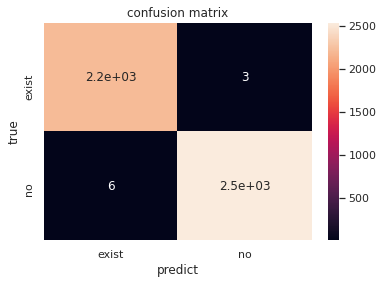

In [30]:
for ds_out in [train_ds_out]:
    result, outputs_dict = ds_out['result'], ds_out['outputs_dict']
    outputs = torch.vstack(outputs_dict['y_pred']).to(device)
    y_true = torch.cat(outputs_dict['y_true'], dim=0).to(device).view(-1)
    print(f'traindataset size: {len(y_true)}')
    f = plt_confusion_matrix(outputs,
                             y_true, 
                             2,
                             full_dataset.classes)
    plt.show()

testdataset size: 1000
tensor([[462.,   5.],
        [  1., 532.]])
tensor([0.9893, 0.9981])


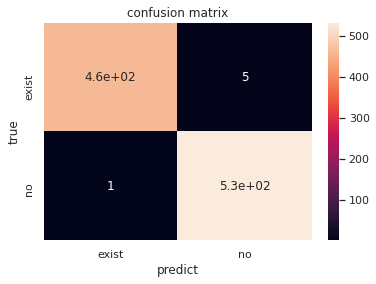

In [33]:
for ds_out in [valid_ds_out]:
    result, outputs_dict = ds_out['result'], ds_out['outputs_dict']
    outputs = torch.vstack(outputs_dict['y_pred']).to(device)
    y_true = torch.cat(outputs_dict['y_true'], dim=0).to(device).view(-1)
    print(f'testdataset size: {len(y_true)}')
    f = plt_confusion_matrix(outputs,
                             y_true, 
                             2,
                             full_dataset.classes)
    plt.show()


## Confuse Matrix(Trained on 6 classes and evaled on 4 classes)

torch.Size([50000, 4]) torch.Size([50000])
tensor([[8.3310e+03, 0.0000e+00, 4.0000e+00, 0.0000e+00],
        [0.0000e+00, 8.3300e+03, 3.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 8.3160e+03, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 8.3240e+03]])
tensor([0.9995, 0.9996, 0.9999, 1.0000])


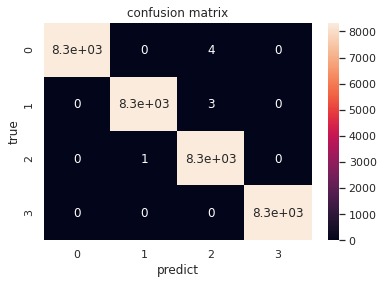

In [5]:
for ds_out in [train_ds_out]:
    result, outputs_dict = ds_out['result'], ds_out['outputs_dict']
    outputs = torch.vstack(outputs_dict['y_pred'])[:, 2:].to(device)
    y_true = torch.vstack(outputs_dict['y_true']).to(device).view(-1) - 2
    print(outputs.size(), y_true.size())
    sns.set()

    confusion_matrix = torch.zeros(4, 4)
    with torch.no_grad():
        _, preds = torch.max(outputs, 1)
        for t, p in zip(y_true.view(-1), preds.view(-1)):
            if t >= 0:
                confusion_matrix[t.long(), p.long()] += 1
    f, ax = plt.subplots()
    print(confusion_matrix)  # 打印出来看看
    print(confusion_matrix.diag()/confusion_matrix.sum(1))
    sns.heatmap(confusion_matrix, annot=True, ax=ax)  # 画热力图

    ax.set_title('confusion matrix')  # 标题
    ax.set_xlabel('predict')  # x轴
    ax.set_ylabel('true')  # y轴
    plt.show()

torch.Size([10000, 4]) torch.Size([10000])
tensor([[1605.,   21.,   35.,    4.],
        [  20., 1634.,   11.,    2.],
        [  11.,   10., 1662.,    0.],
        [   2.,    0.,    0., 1674.]])
tensor([0.9640, 0.9802, 0.9875, 0.9988])
tensor(0.9826)


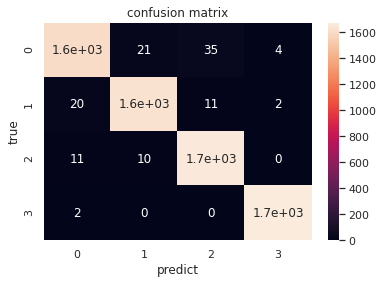

In [8]:
for ds_out in [valid_ds_out]:
    result, outputs_dict = ds_out['result'], ds_out['outputs_dict']
    outputs = torch.vstack(outputs_dict['y_pred'])[:, 2:].to(device)
    y_true = torch.vstack(outputs_dict['y_true']).to(device).view(-1) - 2
    print(outputs.size(), y_true.size())
    sns.set()

    confusion_matrix = torch.zeros(4, 4)
    with torch.no_grad():
        _, preds = torch.max(outputs, 1)
        for t, p in zip(y_true.view(-1), preds.view(-1)):
            if t >= 0:
                confusion_matrix[t.long(), p.long()] += 1
    f, ax = plt.subplots()
    print(confusion_matrix)  # 打印出来看看
    print(confusion_matrix.diag()/confusion_matrix.sum(1))
    print((confusion_matrix.diag()/confusion_matrix.sum(1)).sum()/4 )
    sns.heatmap(confusion_matrix, annot=True, ax=ax)  # 画热力图

    ax.set_title('confusion matrix')  # 标题
    ax.set_xlabel('predict')  # x轴
    ax.set_ylabel('true')  # y轴
    plt.show()

## Confuse Matrix(6 class -> 5 class)

### 1. haze, rainy, snow, sunny, thunder

torch.Size([50000, 5]) torch.Size([50000])
tensor([[8.3430e+03, 5.0000e+00, 0.0000e+00, 5.0000e+00, 0.0000e+00],
        [7.0000e+00, 8.3240e+03, 0.0000e+00, 4.0000e+00, 0.0000e+00],
        [3.0000e+00, 0.0000e+00, 8.3270e+03, 3.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.0000e+00, 8.3160e+03, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 8.3240e+03]])
tensor([0.9988, 0.9987, 0.9993, 0.9999, 1.0000])
tensor(0.9993)


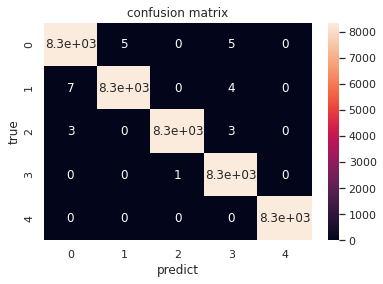

In [8]:
for ds_out in [train_ds_out]:
    result, outputs_dict = ds_out['result'], ds_out['outputs_dict']
    outputs = torch.vstack(outputs_dict['y_pred'])[:, 1:].to(device)
    y_true = torch.vstack(outputs_dict['y_true']).to(device).view(-1) - 1
    print(outputs.size(), y_true.size())
    sns.set()

    confusion_matrix = torch.zeros(5, 5)
    with torch.no_grad():
        _, preds = torch.max(outputs, 1)
        for t, p in zip(y_true.view(-1), preds.view(-1)):
            if t >= 0:
                confusion_matrix[t.long(), p.long()] += 1
    f, ax = plt.subplots()
    print(confusion_matrix)  # 打印出来看看
    print(confusion_matrix.diag()/confusion_matrix.sum(1))
    print((confusion_matrix.diag()/confusion_matrix.sum(1)).sum()/5 )
    sns.heatmap(confusion_matrix, annot=True, ax=ax)  # 画热力图

    ax.set_title('confusion matrix')  # 标题
    ax.set_xlabel('predict')  # x轴
    ax.set_ylabel('true')  # y轴
    plt.show()

torch.Size([10000, 5]) torch.Size([10000])
tensor([[1.4870e+03, 3.8000e+01, 4.7000e+01, 7.0000e+01, 5.0000e+00],
        [2.9000e+01, 1.5860e+03, 1.8000e+01, 3.1000e+01, 1.0000e+00],
        [2.9000e+01, 1.7000e+01, 1.6110e+03, 1.0000e+01, 0.0000e+00],
        [1.7000e+01, 9.0000e+00, 7.0000e+00, 1.6500e+03, 0.0000e+00],
        [4.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.6710e+03]])
tensor([0.9029, 0.9526, 0.9664, 0.9804, 0.9970])
tensor(0.9598)


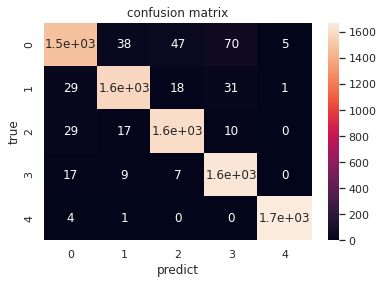

In [9]:
for ds_out in [valid_ds_out]:
    result, outputs_dict = ds_out['result'], ds_out['outputs_dict']
    outputs = torch.vstack(outputs_dict['y_pred'])[:, 1:].to(device)
    y_true = torch.vstack(outputs_dict['y_true']).to(device).view(-1) - 1
    print(outputs.size(), y_true.size())
    sns.set()

    confusion_matrix = torch.zeros(5, 5)
    with torch.no_grad():
        _, preds = torch.max(outputs, 1)
        for t, p in zip(y_true.view(-1), preds.view(-1)):
            if t >= 0:
                confusion_matrix[t.long(), p.long()] += 1
    f, ax = plt.subplots()
    print(confusion_matrix)  # 打印出来看看
    print(confusion_matrix.diag()/confusion_matrix.sum(1))
    print((confusion_matrix.diag()/confusion_matrix.sum(1)).sum()/5 )
    sns.heatmap(confusion_matrix, annot=True, ax=ax)  # 画热力图

    ax.set_title('confusion matrix')  # 标题
    ax.set_xlabel('predict')  # x轴
    ax.set_ylabel('true')  # y轴
    plt.show()

### 2. cloudy, rainy, snow, sunny, thunder

tensor([[8.2680e+03, 6.6000e+01, 0.0000e+00, 4.0000e+00, 0.0000e+00],
        [1.2900e+02, 8.2030e+03, 0.0000e+00, 3.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 8.3300e+03, 3.0000e+00, 0.0000e+00],
        [3.0000e+00, 0.0000e+00, 1.0000e+00, 8.3130e+03, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 8.3240e+03]])
tensor([0.9916, 0.9842, 0.9996, 0.9995, 1.0000])
tensor(0.9950)


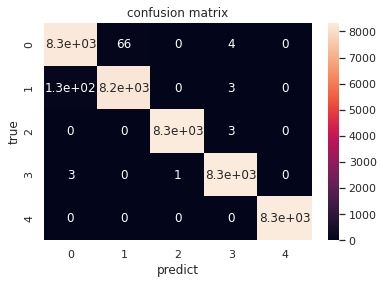

In [6]:
for ds_out in [train_ds_out]:
    result, outputs_dict = ds_out['result'], ds_out['outputs_dict']
    outputs = torch.vstack(outputs_dict['y_pred'])[:, (0,2,3,4,5)].to(device)
    y_true = torch.vstack(outputs_dict['y_true']).to(device).view(-1)
    sns.set()

    confusion_matrix = torch.zeros(5, 5)
    with torch.no_grad():
        _, preds = torch.max(outputs, 1)
        for t, p in zip(y_true.view(-1), preds.view(-1)):
            if t == 1:
                continue
            elif t > 1:
                t -= 1
            confusion_matrix[t.long(), p.long()] += 1
    f, ax = plt.subplots()
    print(confusion_matrix)  # 打印出来看看
    print(confusion_matrix.diag()/confusion_matrix.sum(1))
    print((confusion_matrix.diag()/confusion_matrix.sum(1)).sum()/5 )
    sns.heatmap(confusion_matrix, annot=True, ax=ax)  # 画热力图

    ax.set_title('confusion matrix')  # 标题
    ax.set_xlabel('predict')  # x轴
    ax.set_ylabel('true')  # y轴
    plt.show()

tensor([[1.3370e+03, 1.4400e+02, 1.6000e+01, 1.6200e+02, 3.0000e+00],
        [1.8600e+02, 1.4530e+03, 1.5000e+01, 1.1000e+01, 0.0000e+00],
        [1.8000e+01, 1.2000e+01, 1.6250e+03, 1.0000e+01, 2.0000e+00],
        [8.9000e+01, 1.0000e+00, 9.0000e+00, 1.5840e+03, 0.0000e+00],
        [3.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.6720e+03]])
tensor([0.8045, 0.8727, 0.9748, 0.9412, 0.9976])
tensor(0.9181)


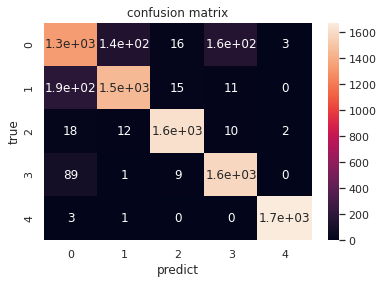

In [7]:
classes = ["haze", "rainy", "snowy", "sunny", "thunder"]
for ds_out in [valid_ds_out]:
    result, outputs_dict = ds_out['result'], ds_out['outputs_dict']
    outputs = torch.vstack(outputs_dict['y_pred'])[:, (0,2,3,4,5)].to(device)
    y_true = torch.vstack(outputs_dict['y_true']).to(device).view(-1)
    sns.set()

    confusion_matrix = torch.zeros(5, 5)
    with torch.no_grad():
        _, preds = torch.max(outputs, 1)
        for t, p in zip(y_true.view(-1), preds.view(-1)):
            if t == 1:
                continue
            elif t > 1:
                t -= 1
            confusion_matrix[t.long(), p.long()] += 1
    f, ax = plt.subplots()
    print(confusion_matrix)  # 打印出来看看
    print(confusion_matrix.diag()/confusion_matrix.sum(1))
    print((confusion_matrix.diag()/confusion_matrix.sum(1)).sum()/5 )
    sns.heatmap(confusion_matrix, annot=True, ax=ax, xticklabels=classes, yticklabels=classes)  # 画热力图

    ax.set_title('confusion matrix')  # 标题
    ax.set_xlabel('predict')  # x轴
    ax.set_ylabel('true')  # y轴
    plt.show()

### 3. cloudy, haze, snow, sunny, thunder

tensor([[8.2390e+03, 9.5000e+01, 0.0000e+00, 4.0000e+00, 0.0000e+00],
        [1.1400e+02, 8.2340e+03, 0.0000e+00, 5.0000e+00, 0.0000e+00],
        [0.0000e+00, 3.0000e+00, 8.3270e+03, 3.0000e+00, 0.0000e+00],
        [3.0000e+00, 0.0000e+00, 1.0000e+00, 8.3130e+03, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 8.3240e+03]])
tensor([0.9881, 0.9858, 0.9993, 0.9995, 1.0000])
tensor(0.9945)


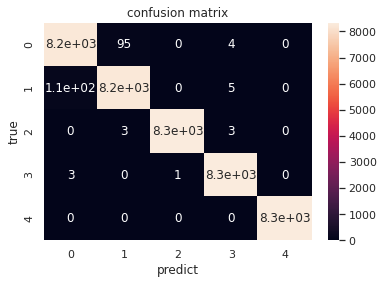

In [8]:
for ds_out in [train_ds_out]:
    result, outputs_dict = ds_out['result'], ds_out['outputs_dict']
    outputs = torch.vstack(outputs_dict['y_pred'])[:, (0,1,3,4,5)].to(device)
    y_true = torch.vstack(outputs_dict['y_true']).to(device).view(-1)
    sns.set()

    confusion_matrix = torch.zeros(5, 5)
    with torch.no_grad():
        _, preds = torch.max(outputs, 1)
        for t, p in zip(y_true.view(-1), preds.view(-1)):
            if t == 2:
                continue
            elif t > 2:
                t -= 1
            confusion_matrix[t.long(), p.long()] += 1
    f, ax = plt.subplots()
    print(confusion_matrix)  # 打印出来看看
    print(confusion_matrix.diag()/confusion_matrix.sum(1))
    print((confusion_matrix.diag()/confusion_matrix.sum(1)).sum()/5 )
    sns.heatmap(confusion_matrix, annot=True, ax=ax)  # 画热力图

    ax.set_title('confusion matrix')  # 标题
    ax.set_xlabel('predict')  # x轴
    ax.set_ylabel('true')  # y轴
    plt.show()

tensor([[1.3440e+03, 1.3900e+02, 1.7000e+01, 1.6000e+02, 2.0000e+00],
        [1.6600e+02, 1.3820e+03, 4.3000e+01, 5.1000e+01, 5.0000e+00],
        [1.6000e+01, 2.8000e+01, 1.6140e+03, 9.0000e+00, 0.0000e+00],
        [8.7000e+01, 1.2000e+01, 6.0000e+00, 1.5780e+03, 0.0000e+00],
        [1.0000e+00, 4.0000e+00, 0.0000e+00, 0.0000e+00, 1.6710e+03]])
tensor([0.8087, 0.8391, 0.9682, 0.9376, 0.9970])
tensor(0.9101)


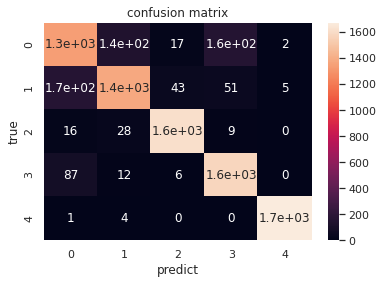

In [9]:
for ds_out in [valid_ds_out]:
    result, outputs_dict = ds_out['result'], ds_out['outputs_dict']
    outputs = torch.vstack(outputs_dict['y_pred'])[:, (0,1,3,4,5)].to(device)
    y_true = torch.vstack(outputs_dict['y_true']).to(device).view(-1)
    sns.set()

    confusion_matrix = torch.zeros(5, 5)
    with torch.no_grad():
        _, preds = torch.max(outputs, 1)
        for t, p in zip(y_true.view(-1), preds.view(-1)):
            if t == 2:
                continue
            elif t > 2:
                t -= 1
            confusion_matrix[t.long(), p.long()] += 1
    f, ax = plt.subplots()
    print(confusion_matrix)  # 打印出来看看
    print(confusion_matrix.diag()/confusion_matrix.sum(1))
    print((confusion_matrix.diag()/confusion_matrix.sum(1)).sum()/5 )
    sns.heatmap(confusion_matrix, annot=True, ax=ax)  # 画热力图

    ax.set_title('confusion matrix')  # 标题
    ax.set_xlabel('predict')  # x轴
    ax.set_ylabel('true')  # y轴
    plt.show()

## Confuse Matrix(4 class)

In [5]:
precomputed_outputs = './predict_4class.out'
ckpt = torch.load(precomputed_outputs)
train_ds_out, valid_ds_out = ckpt['train_ds_out'], ckpt['valid_ds_out']

In [ ]:
for ds_out in [tr_ds_out]:
    result, outputs_dict = ds_out['result'], ds_out['outputs_dict']
    outputs = torch.vstack(outputs_dict['y_pred'])[:, :].to(device)
    y_true = torch.vstack(outputs_dict['y_true']).to(device).view(-1)
    print(outputs.size(), y_true.size())
    sns.set()

    confusion_matrix = torch.zeros(4, 4)
    with torch.no_grad():
        _, preds = torch.max(outputs, 1)
        for t, p in zip(y_true.view(-1), preds.view(-1)):
            confusion_matrix[t.long(), p.long()] += 1
    f, ax = plt.subplots()
    print(confusion_matrix)  # 打印出来看看
    print(confusion_matrix.diag()/confusion_matrix.sum(1))
    print((confusion_matrix.diag()/confusion_matrix.sum(1)).sum()/4 )
    sns.heatmap(confusion_matrix, annot=True, ax=ax)  # 画热力图

    ax.set_title('confusion matrix')  # 标题
    ax.set_xlabel('predict')  # x轴
    ax.set_ylabel('true')  # y轴
    plt.show()

torch.Size([8000, 2]) torch.Size([8000])
tensor([[2005.,    0.,    0.,    0.],
        [   7., 1993.,    0.,    0.],
        [   0.,    0.,    0.,    0.],
        [   0.,    0.,    0.,    0.]])
tensor([1.0000, 0.9965,    nan,    nan])
tensor(nan)


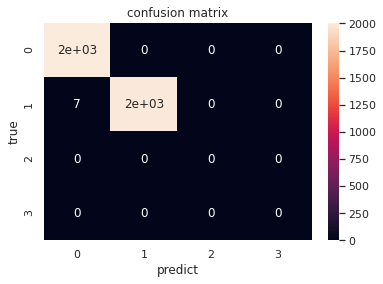

In [7]:
for ds_out in [valid_ds_out]:
    result, outputs_dict = ds_out['result'], ds_out['outputs_dict']
    outputs = torch.vstack(outputs_dict['y_pred'])[:, :].to(device)
    y_true = torch.vstack(outputs_dict['y_true']).to(device).view(-1)
    print(outputs.size(), y_true.size())
    sns.set()

    confusion_matrix = torch.zeros(4, 4)
    with torch.no_grad():
        _, preds = torch.max(outputs, 1)
        for t, p in zip(y_true.view(-1), preds.view(-1)):
            confusion_matrix[t.long(), p.long()] += 1
    f, ax = plt.subplots()
    print(confusion_matrix)  # 打印出来看看
    print(confusion_matrix.diag()/confusion_matrix.sum(1))
    print((confusion_matrix.diag()/confusion_matrix.sum(1)).sum()/4 )
    sns.heatmap(confusion_matrix, annot=True, ax=ax)  # 画热力图

    ax.set_title('confusion matrix')  # 标题
    ax.set_xlabel('predict')  # x轴
    ax.set_ylabel('true')  # y轴
    plt.show()

## Confuse Matrix(class 5)

### 1. classes1 = ['cloudy', 'rainy', 'snow', 'sunny', 'thunder']

In [10]:
precomputed_outputs = './predict_outputs_classes1.out'
ckpt = torch.load(precomputed_outputs)
train_ds_out, valid_ds_out = ckpt['train_ds_out'], ckpt['valid_ds_out']

FileNotFoundError: [Errno 2] No such file or directory: './predict_outputs.out'

In [ ]:
for ds_out in [train_ds_out]:
    result, outputs_dict = ds_out['result'], ds_out['outputs_dict']
    outputs = torch.vstack(outputs_dict['y_pred'])[:, 2:].to(device)
    y_true = torch.vstack(outputs_dict['y_true']).to(device).view(-1) - 2
    print(outputs.size(), y_true.size())
    sns.set()

    confusion_matrix = torch.zeros(4, 4)
    with torch.no_grad():
        _, preds = torch.max(outputs, 1)
        for t, p in zip(y_true.view(-1), preds.view(-1)):
            confusion_matrix[t.long(), p.long()] += 1
    f, ax = plt.subplots()
    print(confusion_matrix)  # 打印出来看看
    print(confusion_matrix.diag()/confusion_matrix.sum(1))
    sns.heatmap(confusion_matrix, annot=True, ax=ax)  # 画热力图

    ax.set_title('confusion matrix')  # 标题
    ax.set_xlabel('predict')  # x轴
    ax.set_ylabel('true')  # y轴
    plt.show()

In [ ]:
for ds_out in [valid_ds_out]:
    result, outputs_dict = ds_out['result'], ds_out['outputs_dict']
    outputs = torch.vstack(outputs_dict['y_pred'])[:, 2:].to(device)
    y_true = torch.vstack(outputs_dict['y_true']).to(device).view(-1)
    print(outputs.size(), y_true.size())
    sns.set()

    confusion_matrix = torch.zeros(5, 5)
    with torch.no_grad():
        _, preds = torch.max(outputs, 1)
        for t, p in zip(y_true.view(-1), preds.view(-1)):
            confusion_matrix[t.long(), p.long()] += 1
    f, ax = plt.subplots()
    print(confusion_matrix)  # 打印出来看看
    print(confusion_matrix.diag()/confusion_matrix.sum(1))
    sns.heatmap(confusion_matrix, annot=True, ax=ax)  # 画热力图

    ax.set_title('confusion matrix')  # 标题
    ax.set_xlabel('predict')  # x轴
    ax.set_ylabel('true')  # y轴
    plt.show()

### 2. classes2 = ['haze', 'rainy', 'snow', 'sunny', 'thunder']

In [ ]:
pre_computed_outputs = './predict_outputs_classes2.out'
ckpt = torch.load(precomputed_outputs)
train_ds_out, valid_ds_out = ckpt['train_ds_out'], ckpt['valid_ds_out']

In [ ]:
for ds_out in [train_ds_out]:
    result, outputs_dict = ds_out['result'], ds_out['outputs_dict']
    outputs = torch.vstack(outputs_dict['y_pred'])[:, 2:].to(device)
    y_true = torch.vstack(outputs_dict['y_true']).to(device).view(-1) - 2
    print(outputs.size(), y_true.size())
    sns.set()

    confusion_matrix = torch.zeros(4, 4)
    with torch.no_grad():
        _, preds = torch.max(outputs, 1)
        for t, p in zip(y_true.view(-1), preds.view(-1)):
            confusion_matrix[t.long(), p.long()] += 1
    f, ax = plt.subplots()
    print(confusion_matrix)  # 打印出来看看
    print(confusion_matrix.diag()/confusion_matrix.sum(1))
    sns.heatmap(confusion_matrix, annot=True, ax=ax)  # 画热力图

    ax.set_title('confusion matrix')  # 标题
    ax.set_xlabel('predict')  # x轴
    ax.set_ylabel('true')  # y轴
    plt.show()

In [ ]:
for ds_out in [valid_ds_out]:
    result, outputs_dict = ds_out['result'], ds_out['outputs_dict']
    outputs = torch.vstack(outputs_dict['y_pred'])[:, 2:].to(device)
    y_true = torch.vstack(outputs_dict['y_true']).to(device).view(-1)
    print(outputs.size(), y_true.size())
    sns.set()

    confusion_matrix = torch.zeros(5, 5)
    with torch.no_grad():
        _, preds = torch.max(outputs, 1)
        for t, p in zip(y_true.view(-1), preds.view(-1)):
            confusion_matrix[t.long(), p.long()] += 1
    f, ax = plt.subplots()
    print(confusion_matrix)  # 打印出来看看
    print(confusion_matrix.diag()/confusion_matrix.sum(1))
    sns.heatmap(confusion_matrix, annot=True, ax=ax)  # 画热力图

    ax.set_title('confusion matrix')  # 标题
    ax.set_xlabel('predict')  # x轴
    ax.set_ylabel('true')  # y轴
    plt.show()

### 3. classes3 = ['cloudy', 'haze', 'snow', 'sunny', 'thunder']

In [ ]:
pre_computed_outputs = './predict_outputs_classes2.out'
ckpt = torch.load(precomputed_outputs)
train_ds_out, valid_ds_out = ckpt['train_ds_out'], ckpt['valid_ds_out']

In [ ]:
for ds_out in [train_ds_out]:
    result, outputs_dict = ds_out['result'], ds_out['outputs_dict']
    outputs = torch.vstack(outputs_dict['y_pred'])[:, 2:].to(device)
    y_true = torch.vstack(outputs_dict['y_true']).to(device).view(-1) - 2
    print(outputs.size(), y_true.size())
    sns.set()

    confusion_matrix = torch.zeros(4, 4)
    with torch.no_grad():
        _, preds = torch.max(outputs, 1)
        for t, p in zip(y_true.view(-1), preds.view(-1)):
            confusion_matrix[t.long(), p.long()] += 1
    f, ax = plt.subplots()
    print(confusion_matrix)  # 打印出来看看
    print(confusion_matrix.diag()/confusion_matrix.sum(1))
    sns.heatmap(confusion_matrix, annot=True, ax=ax)  # 画热力图

    ax.set_title('confusion matrix')  # 标题
    ax.set_xlabel('predict')  # x轴
    ax.set_ylabel('true')  # y轴
    plt.show()

In [ ]:
for ds_out in [valid_ds_out]:
    result, outputs_dict = ds_out['result'], ds_out['outputs_dict']
    outputs = torch.vstack(outputs_dict['y_pred'])[:, 2:].to(device)
    y_true = torch.vstack(outputs_dict['y_true']).to(device).view(-1)
    print(outputs.size(), y_true.size())
    sns.set()

    confusion_matrix = torch.zeros(5, 5)
    with torch.no_grad():
        _, preds = torch.max(outputs, 1)
        for t, p in zip(y_true.view(-1), preds.view(-1)):
            confusion_matrix[t.long(), p.long()] += 1
    f, ax = plt.subplots()
    print(confusion_matrix)  # 打印出来看看
    print(confusion_matrix.diag()/confusion_matrix.sum(1))
    sns.heatmap(confusion_matrix, annot=True, ax=ax)  # 画热力图

    ax.set_title('confusion matrix')  # 标题
    ax.set_xlabel('predict')  # x轴
    ax.set_ylabel('true')  # y轴
    plt.show()